In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
initial_data = pd.read_csv('../cuboid_size_measurements.csv')

## Fragestellung 1: Ist der Zusammenhang zwischen Quadergröße und Ausführungszeit linear?
Es wird vermutet, dass ein linearer Zusammenhang entsteht.

In [4]:
data1 = initial_data
data1['cell_count'] = (data1['length'] * data1['width'] * data1['height'])/1000 # Einheit ist tausend Zellen für bessere Lesbarkeit
data1 = data1.drop(['runName', 'length', 'width', 'height'], axis=1)
data1 = data1.groupby('cell_count').mean()
data_cols = data1.columns
data1['avg'] = data1.mean(axis=1)
data1 = data1.drop(data_cols, axis=1)

data1.reset_index(inplace=True)
data1

,cell_count,avg
0,125.000,5.21875
1,1000.000,20.09375
2,9938.375,450.00000
3,19902.511,1146.62500
4,29791.000,1825.09375
5,39651.821,2532.34375
6,49836.032,4109.78125
7,59776.471,4871.00000
8,64000.000,4830.00000


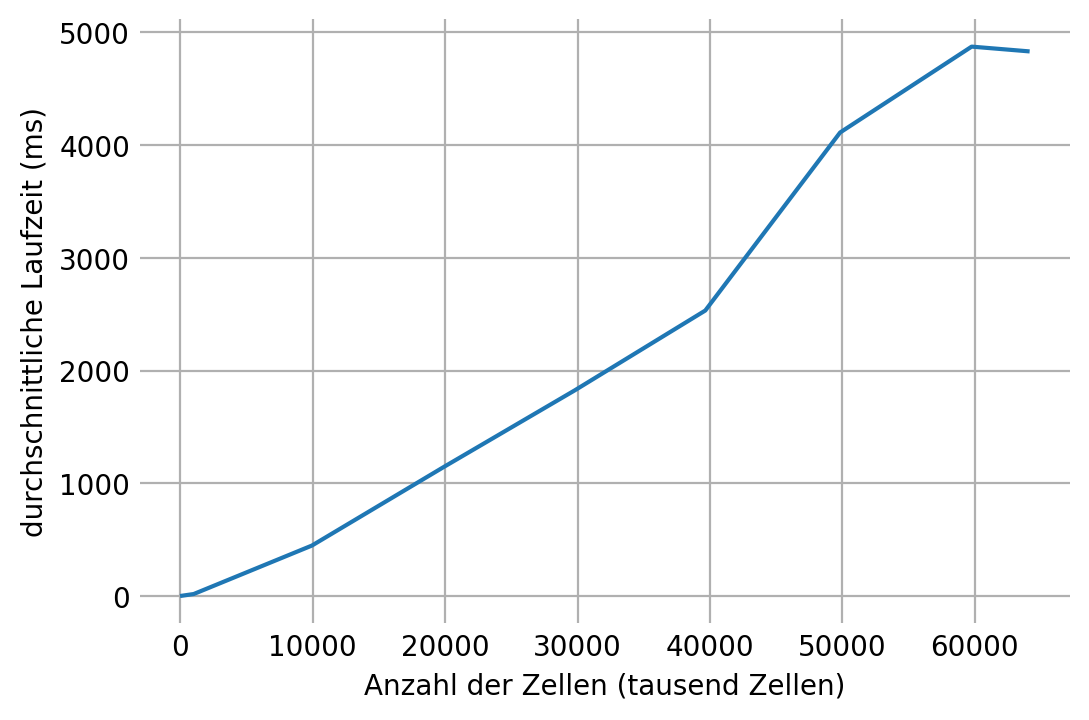

In [5]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.plot(data1['cell_count'], data1['avg'])
ax.set(ylabel='durchschnittliche Laufzeit (ms)', xlabel='Anzahl der Zellen (tausend Zellen)')
ax.ticklabel_format(style='plain')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

ax.grid()

In [6]:
fig.savefig('cuboid_size_linear.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

## Fragestellung 2: Wie ist der Zusammenhang zwischen Ausführungszeit pro Zellen und Quadergröße?

In [7]:
data2 = data1
data2['avg/cell'] = data2['avg']/data2['cell_count']
data2

,cell_count,avg,avg/cell
0,125.000,5.21875,0.041750
1,1000.000,20.09375,0.020094
2,9938.375,450.00000,0.045279
3,19902.511,1146.62500,0.057612
4,29791.000,1825.09375,0.061263
5,39651.821,2532.34375,0.063865
6,49836.032,4109.78125,0.082466
7,59776.471,4871.00000,0.081487
8,64000.000,4830.00000,0.075469


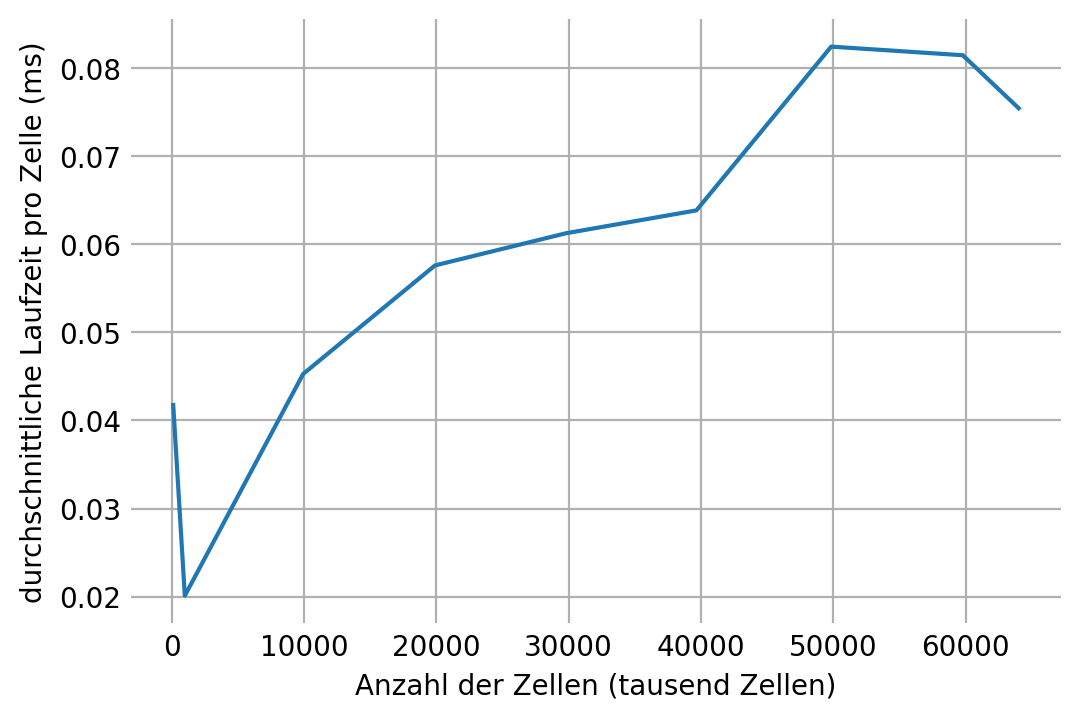

In [8]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.plot(data2['cell_count'], data2['avg/cell'])
ax.set(ylabel='durchschnittliche Laufzeit pro Zelle (ms)', xlabel='Anzahl der Zellen (tausend Zellen)')
ax.ticklabel_format(style='plain')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

ax.grid()

In [9]:
fig.savefig('cuboid_size_linear_per_cell.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

# Fragestellung 3: Messe die Linearität des Zusammenhangs zwischen Zellenanzahl und Laufzeit mit einer Linearen Regression

In [34]:
from sklearn.linear_model import LinearRegression
data3 = data1

In [48]:
model = LinearRegression()
X = np.array(data3.cell_count).reshape(-1, 1)
y = np.array(data3.avg).reshape(-1, 1)
model.fit(X, y)
r_sq = model.score(X, y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination: 0.9797428234800787
intercept: [-258.68965364]
slope: [[0.0807177]]


In [38]:
prediction = model.predict(X)
data3['prediction'] = prediction
data3

,cell_count,avg,avg/cell,prediction
0,125.000,5.21875,0.041750,-248.599941
1,1000.000,20.09375,0.020094,-177.971949
2,9938.375,450.00000,0.045279,543.513166
3,19902.511,1146.62500,0.057612,1347.795354
4,29791.000,1825.09375,0.061263,2145.971490
5,39651.821,2532.34375,0.063865,2941.914328
6,49836.032,4109.78125,0.082466,3763.960465
7,59776.471,4871.00000,0.081487,4566.329885
8,64000.000,4830.00000,0.075469,4907.243452


In [59]:
print(f"Lineares Regression der Form: y = m * x + b")
model_formula = f"y = {model.coef_[0][0]:.2f} * x + {model.intercept_[0]:.2f}"
print(f"Lineares Regression: {model_formula}")

Lineares Regression der Form: y = m * x + b
Lineares Regression: y = 0.08 * x + -258.69


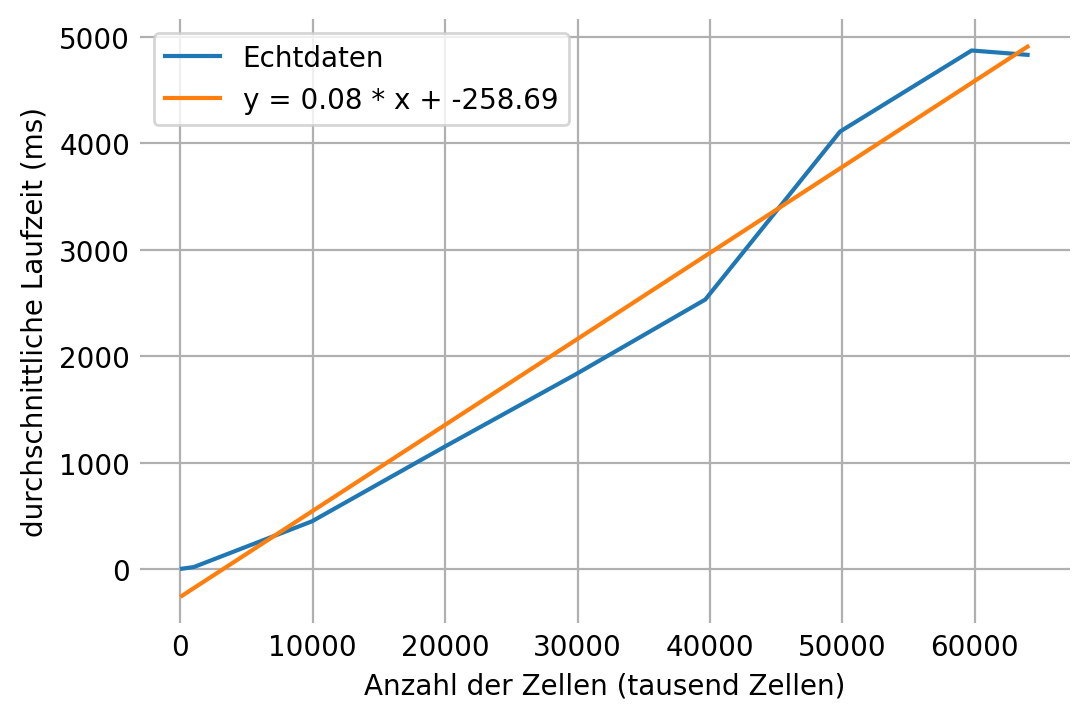

In [60]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot_real = ax.plot(data3['cell_count'], data3['avg'], label='Echtdaten')
bar_plot_predicted = ax.plot(data3['cell_count'], data3['prediction'], label=model_formula)
ax.set(ylabel='durchschnittliche Laufzeit (ms)', xlabel='Anzahl der Zellen (tausend Zellen)')
ax.ticklabel_format(style='plain')
ax.legend()
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

ax.grid()

In [ ]:
fig.savefig('cuboid_size_linear_with_regression.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')